# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 0., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

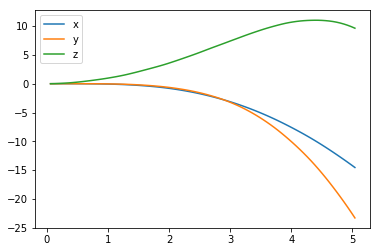

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

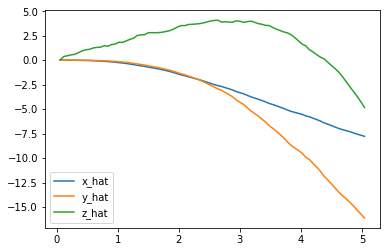

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

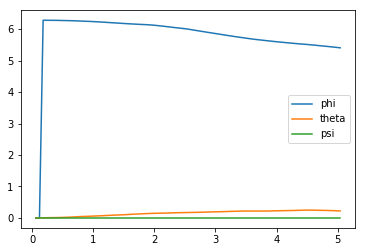

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

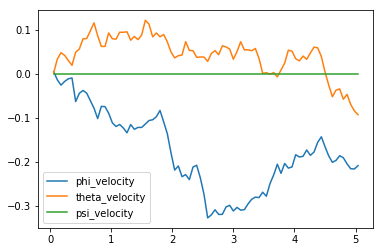

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

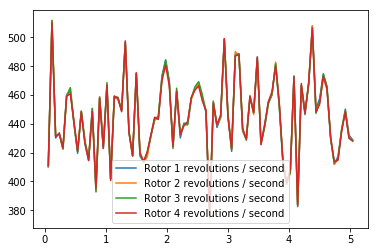

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-14.5385762  -23.28877567   9.63148286   5.40599965   0.22194694
   0.        ]
[ -7.7845831  -16.11844798  -4.83831321]
[-0.20836723 -0.09291764  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
%autoreload 2

import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 500
init_pos = np.array([0., 0., 20.])
target_pos = np.array([0., 0., 30.])
task = Task(target_pos=target_pos)
ps_agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = ps_agent.reset_episode() # start a new episode
    while True:
        action = ps_agent.act(state) 
        next_state, reward, done = task.step(action)
        ps_agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, ps_agent.score, ps_agent.best_score, ps_agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   51, score = -300.000 (best = -300.000), noise_scale = 3.25

/home/yoba/udacity/RL-Quadcopter-2/physics_sim.py:114: RuntimeWarning: invalid value encountered in double_scalars
  J = V / n * D
/home/yoba/udacity/RL-Quadcopter-2/physics_sim.py:114: RuntimeWarning: divide by zero encountered in double_scalars
  J = V / n * D


Episode =  500, score = -300.000 (best = -300.000), noise_scale = 3.2

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [29]:
from agents.agent import DDPG
from monitor import interact

init_pose = np.array([0., 0., 20., 0., 0., 0.])
target_pos = np.array([0., 0., 30.])

num_trials = 2000
task = Task(init_pose=init_pose, runtime=runtime, target_pos=target_pos)
agent = DDPG(task)


episode_rewards, best_reward = interact(task, agent, num_trials)

Episode 1/2000 || Reward -422.81338141536423 || Best reward -422.81338141536423 
Quadcopter pose [ 0.32490186 -5.81887114  0.        ]
Episode 2/2000 || Reward -423.14970765403393 || Best reward -422.81338141536423 
Quadcopter pose [-0.01483374 -5.62895643  0.        ]
Episode 3/2000 || Reward -538.0431660128584 || Best reward -422.81338141536423 
Quadcopter pose [ 0.78490279 -5.28624731  0.        ]
Episode 4/2000 || Reward -651.7514786115122 || Best reward -422.81338141536423 
Quadcopter pose [ 1.36570098 -6.35534221  0.        ]
Episode 5/2000 || Reward -639.3124945013369 || Best reward -422.81338141536423 
Quadcopter pose [ 0.61977354 -6.26058449  0.        ]
Episode 6/2000 || Reward -618.7878878389231 || Best reward -422.81338141536423 
Quadcopter pose [-2.56296894 -7.62171252  0.        ]
Episode 7/2000 || Reward -722.4724148451755 || Best reward -422.81338141536423 
Quadcopter pose [ 7.08505829 -4.36009575  0.        ]
Episode 8/2000 || Reward -532.6476670626903 || Best reward -

Episode 62/2000 || Reward -570.1736625531994 || Best reward -403.70085024882013 
Quadcopter pose [-7.9623655 13.2102624  0.       ]
Episode 63/2000 || Reward -762.719549146203 || Best reward -403.70085024882013 
Quadcopter pose [ -1.56091418 -10.33339248   0.        ]
Episode 64/2000 || Reward -692.6406366932072 || Best reward -403.70085024882013 
Quadcopter pose [ 0.51629225 -8.20797747  0.        ]
Episode 65/2000 || Reward -553.8084476532571 || Best reward -403.70085024882013 
Quadcopter pose [ 0.51936328 -4.6386172   0.        ]
Episode 66/2000 || Reward -442.0537919438941 || Best reward -403.70085024882013 
Quadcopter pose [-4.28899396 -4.99675137  0.        ]
Episode 67/2000 || Reward -480.13565409829033 || Best reward -403.70085024882013 
Quadcopter pose [-5.69453817  0.58146251  0.        ]
Episode 68/2000 || Reward -597.6264694846554 || Best reward -403.70085024882013 
Quadcopter pose [-5.57314972  4.0110599   0.        ]
Episode 69/2000 || Reward -459.6052733378144 || Best re

Episode 123/2000 || Reward -387.69947983969394 || Best reward -386.3492263402578 
Quadcopter pose [ 3.50643531 -2.9955955   0.        ]
Episode 124/2000 || Reward -601.8253818932294 || Best reward -386.3492263402578 
Quadcopter pose [ 3.9727294  -4.70055137  0.        ]
Episode 125/2000 || Reward -497.9753562114422 || Best reward -386.3492263402578 
Quadcopter pose [ 3.3760446  -5.41841468  0.        ]
Episode 126/2000 || Reward -413.1598364690907 || Best reward -386.3492263402578 
Quadcopter pose [ 2.90753147 -8.01947581  0.        ]
Episode 127/2000 || Reward -512.205525130548 || Best reward -386.3492263402578 
Quadcopter pose [ 3.10021915 -7.28975546  0.        ]
Episode 128/2000 || Reward -611.3977707506107 || Best reward -386.3492263402578 
Quadcopter pose [ 3.46090801 -6.57392364  0.        ]
Episode 129/2000 || Reward -510.90394610129374 || Best reward -386.3492263402578 
Quadcopter pose [ 3.43010371 -7.28525183  0.        ]
Episode 130/2000 || Reward -499.6162227467259 || Best 

Episode 183/2000 || Reward -1041.951032095014 || Best reward -386.3492263402578 
Quadcopter pose [ -9.30674853 -35.19186902   0.        ]
Episode 184/2000 || Reward -586.6034497605059 || Best reward -386.3492263402578 
Quadcopter pose [ -2.14966887 -22.42220428   0.        ]
Episode 185/2000 || Reward -613.9398362369317 || Best reward -386.3492263402578 
Quadcopter pose [ -0.609064   -14.98445602   0.        ]
Episode 186/2000 || Reward -560.4292238997946 || Best reward -386.3492263402578 
Quadcopter pose [ 2.81506624 -7.53237391  0.        ]
Episode 187/2000 || Reward -622.20335977898 || Best reward -386.3492263402578 
Quadcopter pose [5.19609106 0.75093324 0.        ]
Episode 188/2000 || Reward -624.1787012331877 || Best reward -386.3492263402578 
Quadcopter pose [5.32517529 2.02242033 0.        ]
Episode 189/2000 || Reward -666.0384608870747 || Best reward -386.3492263402578 
Quadcopter pose [2.30590297 8.36758316 0.        ]
Episode 190/2000 || Reward -614.5791257325154 || Best rew

Episode 245/2000 || Reward -509.1601384863506 || Best reward -386.3492263402578 
Quadcopter pose [ 4.6055718  -3.82643997  0.        ]
Episode 246/2000 || Reward -690.6003303765657 || Best reward -386.3492263402578 
Quadcopter pose [ 3.13026978 -0.81951937  0.        ]
Episode 247/2000 || Reward -664.8512281360422 || Best reward -386.3492263402578 
Quadcopter pose [-3.09940358 -4.04594159  0.        ]
Episode 248/2000 || Reward -700.2585718254363 || Best reward -386.3492263402578 
Quadcopter pose [ 6.81967937 -0.91984188  0.        ]
Episode 249/2000 || Reward -654.8003939612812 || Best reward -386.3492263402578 
Quadcopter pose [ 3.15334005 -7.06062699  0.        ]
Episode 250/2000 || Reward -694.5133496205035 || Best reward -386.3492263402578 
Quadcopter pose [ 6.14235137 -4.38031072  0.        ]
Episode 251/2000 || Reward -553.7460595325433 || Best reward -386.3492263402578 
Quadcopter pose [ 4.04986771 -3.7676875   0.        ]
Episode 252/2000 || Reward -499.75236834230054 || Best 

Episode 306/2000 || Reward -657.7707377954684 || Best reward -386.3492263402578 
Quadcopter pose [0.93669105 7.28449265 0.        ]
Episode 307/2000 || Reward -596.8433983969062 || Best reward -386.3492263402578 
Quadcopter pose [3.74024576 0.37848477 0.        ]
Episode 308/2000 || Reward -487.56554267123767 || Best reward -386.3492263402578 
Quadcopter pose [ 2.59852342 -4.07754794  0.        ]
Episode 309/2000 || Reward -486.6277550496993 || Best reward -386.3492263402578 
Quadcopter pose [ 2.84509463 -3.37890365  0.        ]
Episode 310/2000 || Reward -384.8032203272991 || Best reward -384.8032203272991 
Quadcopter pose [ 2.35746948 -5.44322942  0.        ]
Episode 311/2000 || Reward -381.1819926328711 || Best reward -381.1819926328711 
Quadcopter pose [ 3.15106347 -0.75399403  0.        ]
Episode 312/2000 || Reward -562.1223904509344 || Best reward -381.1819926328711 
Quadcopter pose [0.54580766 6.61394302 0.        ]
Episode 313/2000 || Reward -437.5909221985975 || Best reward -3

Episode 367/2000 || Reward -537.4527532501877 || Best reward 280.08098847249283 
Quadcopter pose [-4.72118001  0.12504797  0.        ]
Episode 368/2000 || Reward -498.03500520298576 || Best reward 280.08098847249283 
Quadcopter pose [0.3789315  0.22010737 0.        ]
Episode 369/2000 || Reward -381.92306931778853 || Best reward 280.08098847249283 
Quadcopter pose [-1.71573265 -0.01237364  0.        ]
Episode 370/2000 || Reward -549.1611704976551 || Best reward 280.08098847249283 
Quadcopter pose [-1.34409026  0.16234374  0.        ]
Episode 371/2000 || Reward -472.51512725031125 || Best reward 280.08098847249283 
Quadcopter pose [-0.83669019 -0.22369589  0.        ]
Episode 372/2000 || Reward -700.8725754966224 || Best reward 280.08098847249283 
Quadcopter pose [-1.01383768 -0.4656617   0.        ]
Episode 373/2000 || Reward -607.5157175322092 || Best reward 280.08098847249283 
Quadcopter pose [-2.84776963 -0.17507455  0.        ]
Episode 374/2000 || Reward -622.4926484279279 || Best r

Episode 428/2000 || Reward -518.0656589288624 || Best reward 280.08098847249283 
Quadcopter pose [-2.50678075 -0.29372796  0.        ]
Episode 429/2000 || Reward -531.6152139574583 || Best reward 280.08098847249283 
Quadcopter pose [-5.05984449 -0.91490221  0.        ]
Episode 430/2000 || Reward -633.857102706158 || Best reward 280.08098847249283 
Quadcopter pose [ 0.35872414 -1.48533863  0.        ]
Episode 431/2000 || Reward -400.01341631005903 || Best reward 280.08098847249283 
Quadcopter pose [-0.82037082  0.08101212  0.        ]
Episode 432/2000 || Reward -563.2696802640991 || Best reward 280.08098847249283 
Quadcopter pose [ 1.15819667 -0.15269632  0.        ]
Episode 433/2000 || Reward -446.8339357598268 || Best reward 280.08098847249283 
Quadcopter pose [ 1.72782511 -0.10020577  0.        ]
Episode 434/2000 || Reward -992.6628406575064 || Best reward 280.08098847249283 
Quadcopter pose [22.13541049  0.64048826  0.        ]
Episode 435/2000 || Reward -605.8048179393891 || Best r

Episode 489/2000 || Reward 827.5641264461892 || Best reward 867.346883764607 
Quadcopter pose [-19.5430184   29.08013067 185.80440356]
Episode 490/2000 || Reward 769.4394032205873 || Best reward 867.346883764607 
Quadcopter pose [-15.59477841  75.86275098 300.        ]
Episode 491/2000 || Reward 804.3994501527617 || Best reward 867.346883764607 
Quadcopter pose [  3.71380501  11.4898789  157.20243881]
Episode 492/2000 || Reward 537.0880905436484 || Best reward 867.346883764607 
Quadcopter pose [-80.77259644   8.46145854  65.23538153]
Episode 493/2000 || Reward 653.7586504138822 || Best reward 867.346883764607 
Quadcopter pose [  9.19658524  88.80899847 300.        ]
Episode 494/2000 || Reward 821.4223247307037 || Best reward 867.346883764607 
Quadcopter pose [-15.89690694   2.93892808 149.27960325]
Episode 495/2000 || Reward 490.4319689212515 || Best reward 867.346883764607 
Quadcopter pose [ 20.97340231 -23.5042318  144.51064982]
Episode 496/2000 || Reward 787.2245675021035 || Best re

Episode 551/2000 || Reward -582.1750167399697 || Best reward 867.346883764607 
Quadcopter pose [8.44632836 0.047518   0.        ]
Episode 552/2000 || Reward -578.8650912143808 || Best reward 867.346883764607 
Quadcopter pose [4.14528294 2.00506046 0.        ]
Episode 553/2000 || Reward -733.2915654451621 || Best reward 867.346883764607 
Quadcopter pose [ 1.60826919 -8.91743818  0.        ]
Episode 554/2000 || Reward -691.5249148321765 || Best reward 867.346883764607 
Quadcopter pose [ 0.56624723 -4.63572248  0.        ]
Episode 555/2000 || Reward 112.61272601202046 || Best reward 867.346883764607 
Quadcopter pose [-1.10143293  1.3180498  34.37342491]
Episode 556/2000 || Reward -732.0012816417614 || Best reward 867.346883764607 
Quadcopter pose [  0.25494463 -43.16471881   0.        ]
Episode 557/2000 || Reward -876.9531562912214 || Best reward 867.346883764607 
Quadcopter pose [ -5.37973363 -37.21800539   0.        ]
Episode 558/2000 || Reward -831.9715274118369 || Best reward 867.3468

Episode 613/2000 || Reward -529.6267881491219 || Best reward 867.346883764607 
Quadcopter pose [-1.72474624 -0.09629311  0.        ]
Episode 614/2000 || Reward -599.0895245767122 || Best reward 867.346883764607 
Quadcopter pose [-1.76301842  3.63552654  0.        ]
Episode 615/2000 || Reward -476.86998997078337 || Best reward 867.346883764607 
Quadcopter pose [-1.76564082 -1.40633653  0.        ]
Episode 616/2000 || Reward -556.6967038201535 || Best reward 867.346883764607 
Quadcopter pose [-1.69416694  2.62359276  0.        ]
Episode 617/2000 || Reward -466.5885804388945 || Best reward 867.346883764607 
Quadcopter pose [-2.1407752   3.39650245  0.        ]
Episode 618/2000 || Reward -693.6660925537544 || Best reward 867.346883764607 
Quadcopter pose [-2.23501852  3.12064505  0.        ]
Episode 619/2000 || Reward -480.2199093053721 || Best reward 867.346883764607 
Quadcopter pose [-2.40200571  2.10028821  0.        ]
Episode 620/2000 || Reward -576.2729817261609 || Best reward 867.346

Episode 675/2000 || Reward -635.9908409109942 || Best reward 867.346883764607 
Quadcopter pose [-41.30363151  -1.26067461   0.        ]
Episode 676/2000 || Reward -197.67081762080957 || Best reward 867.346883764607 
Quadcopter pose [-33.84740218  13.65581152   0.        ]
Episode 677/2000 || Reward -250.0647904005995 || Best reward 867.346883764607 
Quadcopter pose [-46.29957049   4.87507931   0.        ]
Episode 678/2000 || Reward -44.35157248136544 || Best reward 867.346883764607 
Quadcopter pose [-20.80594862 -48.0038984    0.        ]
Episode 679/2000 || Reward 57.85994195501456 || Best reward 867.346883764607 
Quadcopter pose [-87.04784009  -7.70185918   0.        ]
Episode 680/2000 || Reward 523.9638691866186 || Best reward 867.346883764607 
Quadcopter pose [-84.35032051 -23.96651111 104.31932073]
Episode 681/2000 || Reward 606.1871669681738 || Best reward 867.346883764607 
Quadcopter pose [-80.67952227  -3.11106799 109.81512707]
Episode 682/2000 || Reward 645.8070175056192 || Be

Episode 736/2000 || Reward -494.82226796983616 || Best reward 867.346883764607 
Quadcopter pose [0.5510968  0.08243434 0.        ]
Episode 737/2000 || Reward -138.79136176138553 || Best reward 867.346883764607 
Quadcopter pose [-80.97787935  46.48114761   1.56769185]
Episode 738/2000 || Reward 440.70803436975206 || Best reward 867.346883764607 
Quadcopter pose [17.04509666 59.03327083 58.9210104 ]
Episode 739/2000 || Reward 492.05423888983546 || Best reward 867.346883764607 
Quadcopter pose [24.17244775 39.53823613 72.52060814]
Episode 740/2000 || Reward 386.7134769953662 || Best reward 867.346883764607 
Quadcopter pose [-1.05417939e-02  1.02163722e+02  1.73768105e+01]
Episode 741/2000 || Reward 631.5243878721429 || Best reward 867.346883764607 
Quadcopter pose [1.70860892e-02 2.02545773e+01 8.89536393e+01]
Episode 742/2000 || Reward 536.2417820258548 || Best reward 867.346883764607 
Quadcopter pose [73.77576297  2.29696195 38.41832635]
Episode 743/2000 || Reward 473.57105092439934 || 

Episode 796/2000 || Reward -446.42175819205573 || Best reward 867.346883764607 
Quadcopter pose [2.02227589 0.00271522 0.        ]
Episode 797/2000 || Reward -474.9141172521343 || Best reward 867.346883764607 
Quadcopter pose [0.73986404 9.31354426 0.        ]
Episode 798/2000 || Reward -616.8119531043396 || Best reward 867.346883764607 
Quadcopter pose [ 0.34485379 -2.80166478  0.        ]
Episode 799/2000 || Reward -975.9890413057049 || Best reward 867.346883764607 
Quadcopter pose [5.36229136 6.30175675 0.        ]
Episode 800/2000 || Reward -471.515760828765 || Best reward 867.346883764607 
Quadcopter pose [ 0.84072395 -4.81664114  0.        ]
Episode 801/2000 || Reward -726.7309521707461 || Best reward 867.346883764607 
Quadcopter pose [ 2.78861125 13.56603411  0.        ]
Episode 802/2000 || Reward -552.0889143417019 || Best reward 867.346883764607 
Quadcopter pose [ 0.9975255  -9.71992483  0.        ]
Episode 803/2000 || Reward -701.8425529396978 || Best reward 867.346883764607 

Episode 858/2000 || Reward -654.5846372591989 || Best reward 867.346883764607 
Quadcopter pose [-2.34813709 -1.69526814  0.        ]
Episode 859/2000 || Reward -675.7650473935337 || Best reward 867.346883764607 
Quadcopter pose [-2.51687067  0.9274601   0.        ]
Episode 860/2000 || Reward -681.3374224954064 || Best reward 867.346883764607 
Quadcopter pose [3.76162185 1.28060292 0.        ]
Episode 861/2000 || Reward -568.6349042159356 || Best reward 867.346883764607 
Quadcopter pose [2.3534239  0.03252838 0.        ]
Episode 862/2000 || Reward -592.5576345526656 || Best reward 867.346883764607 
Quadcopter pose [2.45151421 6.16785712 0.        ]
Episode 863/2000 || Reward -681.2342778357357 || Best reward 867.346883764607 
Quadcopter pose [-1.01285919  0.22123558  0.        ]
Episode 864/2000 || Reward -723.9562691249962 || Best reward 867.346883764607 
Quadcopter pose [ -1.78796518 -10.18547396   0.        ]
Episode 865/2000 || Reward -475.6357345530014 || Best reward 867.3468837646

Episode 920/2000 || Reward 101.47092626529027 || Best reward 867.346883764607 
Quadcopter pose [ -3.46386368 -11.26803034  46.12955112]
Episode 921/2000 || Reward 122.29745395267257 || Best reward 867.346883764607 
Quadcopter pose [-3.34271971  4.97733798 46.92685672]
Episode 922/2000 || Reward 132.79972653521733 || Best reward 867.346883764607 
Quadcopter pose [-3.36452879  2.01002864 47.09609621]
Episode 923/2000 || Reward 86.81488393036524 || Best reward 867.346883764607 
Quadcopter pose [-3.21549766 12.24046741 46.70214877]
Episode 924/2000 || Reward 127.1493365496786 || Best reward 867.346883764607 
Quadcopter pose [-3.22200891  4.41342136 47.16643421]
Episode 925/2000 || Reward 63.3285550319338 || Best reward 867.346883764607 
Quadcopter pose [-3.26837675 15.9714097  46.08482251]
Episode 926/2000 || Reward 130.43684764791027 || Best reward 867.346883764607 
Quadcopter pose [-3.31128426  3.2809815  47.13769516]
Episode 927/2000 || Reward 142.8781527764457 || Best reward 867.346883

Episode 982/2000 || Reward -524.5051811006699 || Best reward 867.346883764607 
Quadcopter pose [-3.41181851 -7.39776473  0.        ]
Episode 983/2000 || Reward -647.252622080458 || Best reward 867.346883764607 
Quadcopter pose [4.1118434  1.98489155 0.        ]
Episode 984/2000 || Reward -564.6919107465732 || Best reward 867.346883764607 
Quadcopter pose [-0.87782564 -0.81262439  0.        ]
Episode 985/2000 || Reward -439.21410045833744 || Best reward 867.346883764607 
Quadcopter pose [-5.43804981  7.40660241  0.        ]
Episode 986/2000 || Reward -552.1939599191116 || Best reward 867.346883764607 
Quadcopter pose [3.73086611 1.63142563 0.        ]
Episode 987/2000 || Reward -545.5365758284158 || Best reward 867.346883764607 
Quadcopter pose [-2.96303629  1.85376421  0.        ]
Episode 988/2000 || Reward -921.8897935671766 || Best reward 867.346883764607 
Quadcopter pose [ -8.52684936 -38.6720254    0.        ]
Episode 989/2000 || Reward -706.8986508931994 || Best reward 867.3468837

Episode 1044/2000 || Reward -439.1779047662154 || Best reward 867.346883764607 
Quadcopter pose [0.21550029 2.67084536 0.        ]
Episode 1045/2000 || Reward -619.5192195417795 || Best reward 867.346883764607 
Quadcopter pose [-9.06660808  2.70651846  0.        ]
Episode 1046/2000 || Reward -479.2638625647763 || Best reward 867.346883764607 
Quadcopter pose [3.03280447 2.60792213 0.        ]
Episode 1047/2000 || Reward -440.24099325657943 || Best reward 867.346883764607 
Quadcopter pose [-1.31662556  2.74852351  0.        ]
Episode 1048/2000 || Reward -391.9741739211022 || Best reward 867.346883764607 
Quadcopter pose [-3.30828914  2.61881612  0.        ]
Episode 1049/2000 || Reward -539.5679806317285 || Best reward 867.346883764607 
Quadcopter pose [-15.47458122   2.67175352   0.        ]
Episode 1050/2000 || Reward -517.6010118289626 || Best reward 867.346883764607 
Quadcopter pose [-0.5668042  2.7953317  0.       ]
Episode 1051/2000 || Reward -628.4430500452033 || Best reward 867.3

Episode 1106/2000 || Reward -375.93688628992044 || Best reward 867.346883764607 
Quadcopter pose [-0.0966783   0.71815599  0.        ]
Episode 1107/2000 || Reward -433.3278378955039 || Best reward 867.346883764607 
Quadcopter pose [-0.04208512  0.75901479  0.        ]
Episode 1108/2000 || Reward -414.7710913376243 || Best reward 867.346883764607 
Quadcopter pose [4.25528757e-04 7.58515007e-01 0.00000000e+00]
Episode 1109/2000 || Reward -411.5184943791694 || Best reward 867.346883764607 
Quadcopter pose [-0.00182819  0.76080422  0.        ]
Episode 1110/2000 || Reward -432.53215244080303 || Best reward 867.346883764607 
Quadcopter pose [-0.04171037  0.76268844  0.        ]
Episode 1111/2000 || Reward -461.6856891270319 || Best reward 867.346883764607 
Quadcopter pose [-0.04098421  0.75838968  0.        ]
Episode 1112/2000 || Reward -454.01283257437655 || Best reward 867.346883764607 
Quadcopter pose [-0.03706308  0.68354741  0.        ]
Episode 1113/2000 || Reward -460.84595305614664 ||

Episode 1168/2000 || Reward -373.29730774552945 || Best reward 867.346883764607 
Quadcopter pose [-0.03539882  0.74176776  0.        ]
Episode 1169/2000 || Reward -463.40424192666245 || Best reward 867.346883764607 
Quadcopter pose [-0.07006551  0.86966419  0.        ]
Episode 1170/2000 || Reward -449.64501973122884 || Best reward 867.346883764607 
Quadcopter pose [-0.07203684  0.89245963  0.        ]
Episode 1171/2000 || Reward -423.67324815427355 || Best reward 867.346883764607 
Quadcopter pose [-0.06164962  1.01412458  0.        ]
Episode 1172/2000 || Reward -451.47748118849665 || Best reward 867.346883764607 
Quadcopter pose [-0.07981926  0.87215807  0.        ]
Episode 1173/2000 || Reward -403.56243315233553 || Best reward 867.346883764607 
Quadcopter pose [0.04279255 0.85435185 0.        ]
Episode 1174/2000 || Reward -432.7374536175563 || Best reward 867.346883764607 
Quadcopter pose [-0.07844038  0.86951296  0.        ]
Episode 1175/2000 || Reward -460.3169409280415 || Best rewa

Episode 1229/2000 || Reward -444.39054550065987 || Best reward 867.346883764607 
Quadcopter pose [0.0291761  0.86495755 0.        ]
Episode 1230/2000 || Reward -455.8196705353431 || Best reward 867.346883764607 
Quadcopter pose [-0.06736905  0.76113979  0.        ]
Episode 1231/2000 || Reward -437.3261861546712 || Best reward 867.346883764607 
Quadcopter pose [-0.05183577  0.78649666  0.        ]
Episode 1232/2000 || Reward -461.6437547840617 || Best reward 867.346883764607 
Quadcopter pose [-0.04992189  0.7881466   0.        ]
Episode 1233/2000 || Reward -388.86803876471583 || Best reward 867.346883764607 
Quadcopter pose [-0.00931119  0.76703418  0.        ]
Episode 1234/2000 || Reward -384.46476621924523 || Best reward 867.346883764607 
Quadcopter pose [-0.04230227  0.77035534  0.        ]
Episode 1235/2000 || Reward -447.4273177326694 || Best reward 867.346883764607 
Quadcopter pose [-0.03683018  0.76758315  0.        ]
Episode 1236/2000 || Reward -386.89051412260307 || Best reward

Episode 1291/2000 || Reward -390.88462011578986 || Best reward 867.346883764607 
Quadcopter pose [-0.05105758  0.19721912  0.        ]
Episode 1292/2000 || Reward -558.9529004642379 || Best reward 867.346883764607 
Quadcopter pose [-0.09253009  0.27718222  0.        ]
Episode 1293/2000 || Reward -632.8082668951283 || Best reward 867.346883764607 
Quadcopter pose [-0.14032035  0.11442517  0.        ]
Episode 1294/2000 || Reward -428.57231379838873 || Best reward 867.346883764607 
Quadcopter pose [-0.09895204  0.32244461  0.        ]
Episode 1295/2000 || Reward -472.57392940250156 || Best reward 867.346883764607 
Quadcopter pose [-0.11357193  0.8230703   0.        ]
Episode 1296/2000 || Reward -572.7616067876822 || Best reward 867.346883764607 
Quadcopter pose [ 0.02762138 -0.41083102  0.        ]
Episode 1297/2000 || Reward -658.7648027199607 || Best reward 867.346883764607 
Quadcopter pose [-0.3857428 -0.2873746  0.       ]
Episode 1298/2000 || Reward -406.69938618953097 || Best reward

Episode 1353/2000 || Reward -641.9675952312359 || Best reward 867.346883764607 
Quadcopter pose [-1.27533868  0.7615359   0.        ]
Episode 1354/2000 || Reward -545.3204900628225 || Best reward 867.346883764607 
Quadcopter pose [-2.36163846 -0.23582561  0.        ]
Episode 1355/2000 || Reward -374.04031568929133 || Best reward 867.346883764607 
Quadcopter pose [-1.68202132 -0.58899263  0.        ]
Episode 1356/2000 || Reward -624.4689741048261 || Best reward 867.346883764607 
Quadcopter pose [-5.62414764 -0.87877929  0.        ]
Episode 1357/2000 || Reward -503.8213090781072 || Best reward 867.346883764607 
Quadcopter pose [-4.42360673 -0.70251627  0.        ]
Episode 1358/2000 || Reward -529.1086438303894 || Best reward 867.346883764607 
Quadcopter pose [-9.83274752  1.85192712  0.        ]
Episode 1359/2000 || Reward -461.45760578491723 || Best reward 867.346883764607 
Quadcopter pose [-3.28343572 43.17928553  0.        ]
Episode 1360/2000 || Reward 702.017927499717 || Best reward 

Episode 1414/2000 || Reward 622.8575168073626 || Best reward 876.9221357544882 
Quadcopter pose [ 28.11838429  41.17854793 294.69258263]
Episode 1415/2000 || Reward 747.7089582394055 || Best reward 876.9221357544882 
Quadcopter pose [-48.15672352  -3.8703599  135.36592398]
Episode 1416/2000 || Reward 486.2832041175613 || Best reward 876.9221357544882 
Quadcopter pose [ 19.31128185 -24.25179372 147.37541272]
Episode 1417/2000 || Reward 570.1818828478089 || Best reward 876.9221357544882 
Quadcopter pose [150. 150. 300.]
Episode 1418/2000 || Reward 781.0797022507069 || Best reward 876.9221357544882 
Quadcopter pose [-19.48556468 -27.43691012 141.35619346]
Episode 1419/2000 || Reward 496.25120533158156 || Best reward 876.9221357544882 
Quadcopter pose [ 30.08405329 -99.56427377 112.44646866]
Episode 1420/2000 || Reward 649.3173093792691 || Best reward 876.9221357544882 
Quadcopter pose [-10.87893    -28.00405768 144.27639936]
Episode 1421/2000 || Reward 343.76184685089356 || Best reward 87

Episode 1475/2000 || Reward -338.93888859157033 || Best reward 876.9221357544882 
Quadcopter pose [-0.0961453  -0.03585244  0.        ]
Episode 1476/2000 || Reward -325.2364606002136 || Best reward 876.9221357544882 
Quadcopter pose [-0.10086739 -0.03229783  0.        ]
Episode 1477/2000 || Reward -310.14116111055296 || Best reward 876.9221357544882 
Quadcopter pose [-0.09776098 -0.03160268  0.        ]
Episode 1478/2000 || Reward -306.21110793197397 || Best reward 876.9221357544882 
Quadcopter pose [-0.10036584 -0.03164113  0.        ]
Episode 1479/2000 || Reward -262.2181359843751 || Best reward 876.9221357544882 
Quadcopter pose [-0.10198178 -0.03256214  0.        ]
Episode 1480/2000 || Reward -270.17268689024615 || Best reward 876.9221357544882 
Quadcopter pose [-0.10053093 -0.03307966  0.        ]
Episode 1481/2000 || Reward -309.1294753218108 || Best reward 876.9221357544882 
Quadcopter pose [-0.09564743 -0.03379862  0.        ]
Episode 1482/2000 || Reward -302.0633045434058 || B

Episode 1536/2000 || Reward -365.49690398778336 || Best reward 876.9221357544882 
Quadcopter pose [-0.07676692 -0.02954698  0.        ]
Episode 1537/2000 || Reward -361.9948634583127 || Best reward 876.9221357544882 
Quadcopter pose [-0.07412424 -0.03160562  0.        ]
Episode 1538/2000 || Reward -255.92919985892343 || Best reward 876.9221357544882 
Quadcopter pose [-0.07444228 -0.03337795  0.        ]
Episode 1539/2000 || Reward -330.9628639222033 || Best reward 876.9221357544882 
Quadcopter pose [-0.07487315 -0.03290987  0.        ]
Episode 1540/2000 || Reward -354.9831404723656 || Best reward 876.9221357544882 
Quadcopter pose [-0.07499611 -0.03087111  0.        ]
Episode 1541/2000 || Reward -298.4062509313971 || Best reward 876.9221357544882 
Quadcopter pose [-0.07587265 -0.02587326  0.        ]
Episode 1542/2000 || Reward -567.6037587448916 || Best reward 876.9221357544882 
Quadcopter pose [-0.28687382 -0.15933449  0.        ]
Episode 1543/2000 || Reward -572.8498680786483 || Bes

Episode 1597/2000 || Reward -387.080558658047 || Best reward 876.9221357544882 
Quadcopter pose [ 0.39984323 -0.69334115  0.        ]
Episode 1598/2000 || Reward -294.9499911618602 || Best reward 876.9221357544882 
Quadcopter pose [0.55505502 0.18213246 0.        ]
Episode 1599/2000 || Reward -497.0248697013467 || Best reward 876.9221357544882 
Quadcopter pose [1.48210908 0.96289579 0.        ]
Episode 1600/2000 || Reward -401.6919349601821 || Best reward 876.9221357544882 
Quadcopter pose [-1.15566531 -0.25913708  0.        ]
Episode 1601/2000 || Reward -306.15336476764276 || Best reward 876.9221357544882 
Quadcopter pose [-0.96677834  0.08751367  0.        ]
Episode 1602/2000 || Reward -446.5100630102356 || Best reward 876.9221357544882 
Quadcopter pose [1.2160957  0.21915562 0.        ]
Episode 1603/2000 || Reward -597.0574339753766 || Best reward 876.9221357544882 
Quadcopter pose [1.17582769 0.3515198  0.        ]
Episode 1604/2000 || Reward -586.9023298562222 || Best reward 876.9

Episode 1658/2000 || Reward -632.9486805763031 || Best reward 876.9221357544882 
Quadcopter pose [-1.01977155 -2.68212259  0.        ]
Episode 1659/2000 || Reward -408.2211443909289 || Best reward 876.9221357544882 
Quadcopter pose [-3.84813618  0.42951129  0.        ]
Episode 1660/2000 || Reward -627.1189000392208 || Best reward 876.9221357544882 
Quadcopter pose [ 1.54978877 -2.10602747  0.        ]
Episode 1661/2000 || Reward -528.7615638434546 || Best reward 876.9221357544882 
Quadcopter pose [-5.75787433  3.00147295  0.        ]
Episode 1662/2000 || Reward -390.1761947481823 || Best reward 876.9221357544882 
Quadcopter pose [-2.86213445 -0.97575989  0.        ]
Episode 1663/2000 || Reward -614.2815563265285 || Best reward 876.9221357544882 
Quadcopter pose [-3.84907004 -8.91767888  0.        ]
Episode 1664/2000 || Reward -507.3703080602782 || Best reward 876.9221357544882 
Quadcopter pose [-5.24346811 -8.37090207  0.        ]
Episode 1665/2000 || Reward -677.8708123233018 || Best 

Episode 1719/2000 || Reward 624.6025351444124 || Best reward 878.9702215510249 
Quadcopter pose [ 43.75455918  -2.84222214 171.97019926]
Episode 1720/2000 || Reward 636.1738596503203 || Best reward 878.9702215510249 
Quadcopter pose [ 29.23712369  31.10566275 143.52600881]
Episode 1721/2000 || Reward 539.766367185689 || Best reward 878.9702215510249 
Quadcopter pose [-85.66986163  -0.20624392 100.11146175]
Episode 1722/2000 || Reward 755.2440687268645 || Best reward 878.9702215510249 
Quadcopter pose [-11.63268347  24.44544491 205.19720454]
Episode 1723/2000 || Reward 765.8488132735307 || Best reward 878.9702215510249 
Quadcopter pose [-12.65463225 102.65410949 300.        ]
Episode 1724/2000 || Reward 616.6898424281036 || Best reward 878.9702215510249 
Quadcopter pose [ 11.88891161 -33.19620548 162.25313546]
Episode 1725/2000 || Reward 916.1412196112705 || Best reward 916.1412196112705 
Quadcopter pose [-22.65752278  11.91928034 144.8559082 ]
Episode 1726/2000 || Reward 470.3759803538

Episode 1779/2000 || Reward 627.9273757497923 || Best reward 916.1412196112705 
Quadcopter pose [-43.83864505 -55.17916216 110.41805629]
Episode 1780/2000 || Reward 727.772302497461 || Best reward 916.1412196112705 
Quadcopter pose [-75.84588201  13.07859884 115.50340346]
Episode 1781/2000 || Reward 762.6971368374004 || Best reward 916.1412196112705 
Quadcopter pose [-11.6282611   -9.74282314 147.4339636 ]
Episode 1782/2000 || Reward 474.3819408903399 || Best reward 916.1412196112705 
Quadcopter pose [ 37.74386776 -68.20760993 105.36960326]
Episode 1783/2000 || Reward 530.3287254145994 || Best reward 916.1412196112705 
Quadcopter pose [ 26.34212089 -27.95753614 143.8253324 ]
Episode 1784/2000 || Reward 596.7358558641137 || Best reward 916.1412196112705 
Quadcopter pose [ 25.9164142   45.61531015 199.75716734]
Episode 1785/2000 || Reward 799.6159895008342 || Best reward 916.1412196112705 
Quadcopter pose [ -3.61533853  20.0255739  167.86598074]
Episode 1786/2000 || Reward 728.1407025936

Episode 1839/2000 || Reward 783.6395452370775 || Best reward 916.1412196112705 
Quadcopter pose [  4.15522154  24.05602397 148.85163734]
Episode 1840/2000 || Reward 788.3567968598098 || Best reward 916.1412196112705 
Quadcopter pose [-30.47886193   4.49318734 143.8294214 ]
Episode 1841/2000 || Reward 490.0271367581487 || Best reward 916.1412196112705 
Quadcopter pose [ 55.74181788 -64.25665423  92.74110959]
Episode 1842/2000 || Reward 656.7676903080535 || Best reward 916.1412196112705 
Quadcopter pose [  9.65265559   4.39444992 177.13222535]
Episode 1843/2000 || Reward 738.3040238780505 || Best reward 916.1412196112705 
Quadcopter pose [  8.48807555  21.24851682 147.36452574]
Episode 1844/2000 || Reward 541.5426327813914 || Best reward 916.1412196112705 
Quadcopter pose [-58.18806874 -53.93867621 111.61783851]
Episode 1845/2000 || Reward 676.3209939160627 || Best reward 916.1412196112705 
Quadcopter pose [-37.16617281 -27.51791628 139.91471077]
Episode 1846/2000 || Reward 837.734858319

Episode 1899/2000 || Reward 925.2880108078699 || Best reward 925.2880108078699 
Quadcopter pose [ -7.47797762   4.54160984 148.27551448]
Episode 1900/2000 || Reward 408.6153960918053 || Best reward 925.2880108078699 
Quadcopter pose [  25.63755185 -150.          247.20344119]
Episode 1901/2000 || Reward 722.6443705017858 || Best reward 925.2880108078699 
Quadcopter pose [-79.77854587 -16.33804939  79.07338024]
Episode 1902/2000 || Reward 685.0621816604922 || Best reward 925.2880108078699 
Quadcopter pose [ 17.11595992  29.19771683 149.25255953]
Episode 1903/2000 || Reward 716.9382540451763 || Best reward 925.2880108078699 
Quadcopter pose [ 13.21244514  14.39954869 153.75060239]
Episode 1904/2000 || Reward 765.2083285468188 || Best reward 925.2880108078699 
Quadcopter pose [-47.55975447   8.77607408 138.0824604 ]
Episode 1905/2000 || Reward 594.2280741287168 || Best reward 925.2880108078699 
Quadcopter pose [ 31.12173765  12.4684665  190.07077959]
Episode 1906/2000 || Reward 786.879961

Episode 1959/2000 || Reward 530.0044955329212 || Best reward 925.2880108078699 
Quadcopter pose [150.         107.69194829 215.33739616]
Episode 1960/2000 || Reward 686.9637680849962 || Best reward 925.2880108078699 
Quadcopter pose [ 22.28230796  23.33905472 145.3515009 ]
Episode 1961/2000 || Reward 457.64178874919423 || Best reward 925.2880108078699 
Quadcopter pose [ 59.34418433 -62.19186419 103.32061193]
Episode 1962/2000 || Reward 738.5439086528283 || Best reward 925.2880108078699 
Quadcopter pose [-32.99281219  11.57762698 125.13974444]
Episode 1963/2000 || Reward -555.4104031795333 || Best reward 925.2880108078699 
Quadcopter pose [ 1.71618868 -8.35904146  0.        ]
Episode 1964/2000 || Reward -668.2938679252086 || Best reward 925.2880108078699 
Quadcopter pose [2.31031844 4.46119039 0.        ]
Episode 1965/2000 || Reward -463.46775637815324 || Best reward 925.2880108078699 
Quadcopter pose [ 3.60378742 -3.38618313  0.        ]
Episode 1966/2000 || Reward -490.7918239465868 |

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

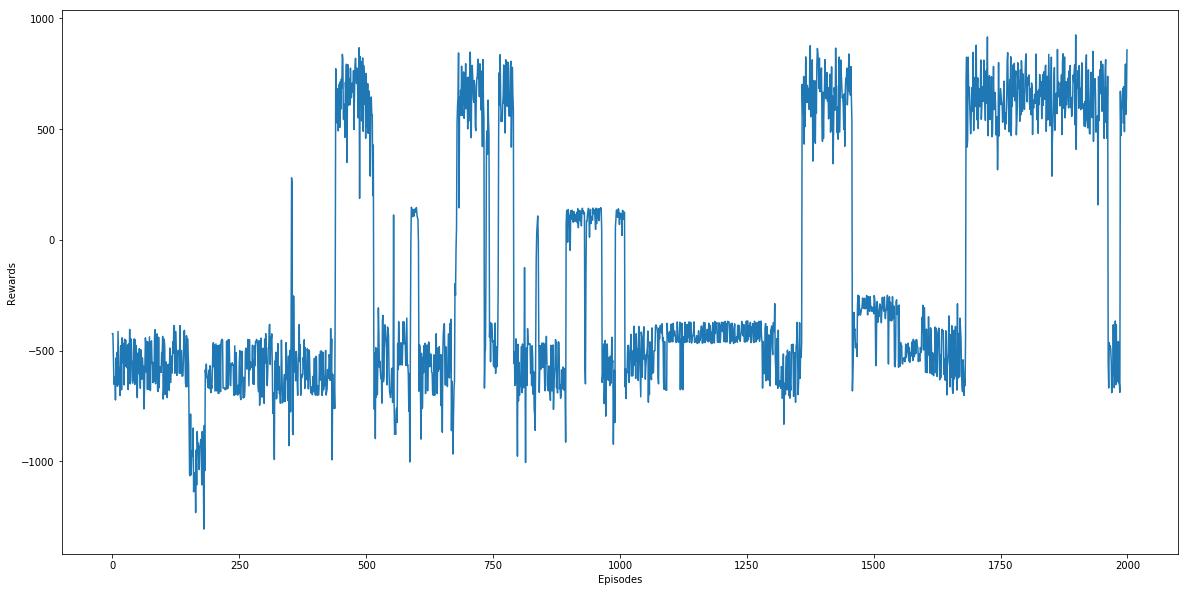

In [30]:
from monitor import plot_rewards

plot_rewards(episode_rewards)

## Run sample eposide and observe agent's behavior

In [38]:
from monitor import run_sample_task

runtime=5.
init_velocities = np.array([0., 0., 0.])        
init_angle_velocities = np.array([0., 0., 0.])  
init_pose = np.array([0., 0., 0., 0., 0., 0.])
target_pos = np.array([0., 0., 20.])

task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)

results = run_sample_task(agent, task)


Total episode reward : 236.3572706720288


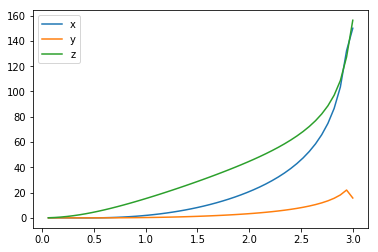

In [39]:
from monitor import plot_position

plot_position(results)

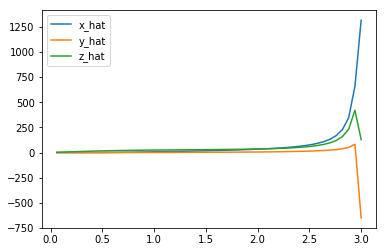

In [40]:
from monitor import plot_velocity

plot_velocity(results)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I've decided to teach quadcopter to take off. 
There were a lot of reward function options before I've found the final solution (which is not quite perfect, but it's the most efficient among the all I've tried). 
The most important source of inspiration was [this](https://www.bons.ai/blog/reward-functions-reinforcement-learning-video) article. 
The main requirements for the takeoff task are:
- The agent should flight as high as he can, but it shouldn't crash.
- The agent should stick to more or less stable x and y position, avoid large deviations from target x and y.
- The agent shouldn't rotate much, and its position in the space should be stable during taking off. 
- The agent's z position shouldn't be lower the target. 

So the primary strategy was:
- Huge penalty for crashes.
- The reward for reaching a target or higher.
- Penalty for getting lower than a target position. 
- Penalty for deviations from x and y position.
- Penalty for higher Euler angles. 

I wanted the reward for flying higher to increase gradually, so I've chosen the function: `1. - (curr_distance / max_distance) ** 0.4`. The graph below illustrates how does the reward changes depending on z position. 

After the agent reaches target height and higher, I'm encouraging it with constant reward instead of graduate.  

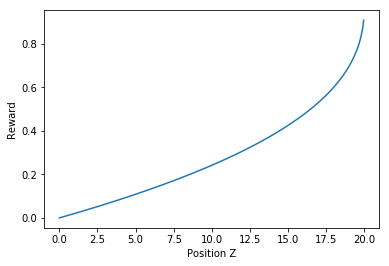

In [26]:
import math 
import matplotlib.pyplot as plt
%matplotlib inline

reward_function_z = lambda pose, target_pos: 1. - (np.abs(target_pos - pose) / 20.) **0.4

values = np.arange(0., 20., 0.05)
target_pos = 20.

plt.plot(values, reward_function_z(values, target_pos))
plt.xlabel("Position Z")
plt.ylabel("Reward")
plt.show()

The same function was used to calculate the penalty for descent below the target. 

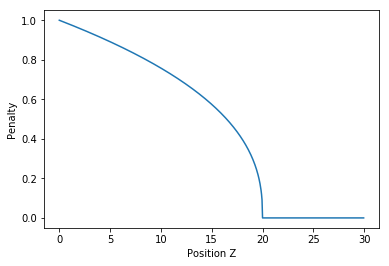

In [11]:
getting_lower_penalty = lambda pose, initial_pos:(abs(min(pose - initial_pos, 0))/initial_pos)**0.4
values = np.arange(0., 30., 0.05)
initial_pos = 20.

penalties = [getting_lower_penalty(p, initial_pos) for p in values]
plt.plot(values, penalties)
plt.xlabel("Position Z")
plt.ylabel("Penalty")
plt.show()

I didn't want to punish much for x and y deviations, so I've introduced the tolerable deviation range, which is not punished much. It's demonstrated at the heatmap below.

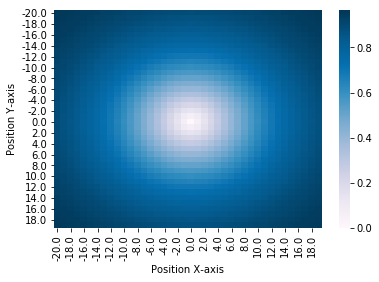

In [12]:
import seaborn as sns
%matplotlib inline


def map_function(reward_function, x, y, target_pos):
    R = pd.DataFrame(np.zeros([len(x), len(y)]), index=y, columns=x)
    for xx in x:
        for yy in y:
            R[xx][yy] = reward_function([xx, yy], target_pos)

    return R


eucl_distance = lambda a, b: np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
tolerable_xy_dev = eucl_distance([0., 0.], [10., 10.])
penalty_function_xy = lambda pose, target_pos: np.tanh(eucl_distance(pose, target_pos) / tolerable_xy_dev)

x_range = np.round(np.arange(-20., 20., 1), 2)
y_range = np.round(np.arange(-20., 20., 1), 2)
target_pos = np.array([0., 0.])

R = map_function(penalty_function_xy, x_range, y_range, target_pos)

ax = sns.heatmap(R, cmap="PuBu")
ax.set_xlabel("Position X-axis")
ax.set_ylabel("Position Y-axis")
plt.show()


**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
I've decided to use the provided DDPG algorithm and changed a few things. 
It didn't work at first at all, so I've changed actors and critics neural networks sizes many times, but the agent seemed not to be learning at all. 
But after a while, I've realized that the main problem was the reward function, so I've focused on it. 
I've changed only few hyperparameters of provided agent: 

``
self.batch_size = 128
self.gamma = 0.90  # discount factor
self.tau = 0.003  # for soft update of target parameters
``

I've also added batch normalization and dropout to both actor and critic models. Also, I've added more layers to the combined critic model. 

**Actor:**
- Input
- Dense(32, relu)
- Batch normalization
- Dropout(0.2)
- Dense(64, relu)
- Batch normalization
- Dropout(0.3)
- Dense(32, relu)
- Batch normalization
- Dropout(0.2)
- Output(sigmoid)

**Critic:**

*States *
- Input
- Dense(64, relu)
- Batch normalization
- Dropout(0.2)
- Dense(32, relu)
- Batch normalization
- Dropout(0.1)

*Actions*
- Input
- Dense(64, relu)
- Batch normalization
- Dropout(0.2)
- Dense(32, relu)
- Batch normalization
- Dropout(0.1)

*Combined*
- Dense combined (relu)
- Dense(128, relu)
- Batch normalization
- Dropout(0.2)
- Dense(64, relu)
- Batch normalization
- Dropout(0.1)

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
As we can see from the rewards plot, it was not an easy task to learn. Due to the complexity of the environment and the fact that even insignificant change in action could cause a huge difference, it wasn't easy for the agent to figure out what exactly should it do. So it tries different actions many episodes until finally founds the successful combination.
The learning curve is not gradual, the agent is still unstable, and even after successful attempts, the agent still is unable to stabilize the reward and falls. 
However, after many attempts, it looks like the agent was finally able to accomplish the takeoff task.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

That was by far the most challenging project I've had during this Nanodegree. 
The hardest was the beginning when I didn't even know where to start and what to do. And even after I've started trying, nothing worked. It was really frustrating and time-consuming. However, despite all the complexity, I've gained a lot of beneficial practice and experience. 

There are few interesting observations about takeoff task: 
1. The better results are achieved if the agent starts the episode not from the ground, but somewhere in the air. It makes episodes longer, especially at the beginning of learning, so the agent could gain more experience, which would be impossible if it started from the ground due to the high crash rate. 
2. I've tried to end episode right after agent reaches the target (rewarding it with 100. reward). At first, during learning agent was behaving as expected: reached target and ended episode. But after that it somehow figured out, that it's more 'profitable' to avoid episode's ending, and flew somewhere in between the surface and the target until timeout😃 
I thought such behavior was caused by disbalance between rewards for reaching the target and for approaching it, but after some more long unsuccessful experiments, I've dropped the idea of episode termination. (Probably it could work after more tuning). 
